### TODO:
- Replicate table 3.4 from Chaoyun's paper

In [3]:
from __future__ import division

from utils import *
from create_data import *

import os
import pandas as pd
import numpy as np
from collections import OrderedDict
import time
from datetime import datetime
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
# from datetime import utcfromtimestamp

# import sqlite3

from ggplot import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

### R stuff

In [2]:
# If you want to ignore R warnings.
# import warnings
# warnings.filterwarnings('ignore')

# from rpy2.robjects.packages import isinstalled
# from rpy2.robjects.vectors import StrVector
# import rpy2.robjects.packages as rpackages
# from rpy2.robjects.packages import importr

# utils = rpackages.importr('utils')
# utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# packnames = ('forecast')
# utils.install_packages(packnames)

# isinstalled('forecast')

# %%R
# y <- 1

# %load_ext rpy2.ipython

### Define project vars

In [4]:
dir_proj = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis'
dir_data = os.path.join(dir_proj, 'data')
dir_run = os.path.join(dir_proj, 'run', str(date.today()))

In [5]:
HOUSE_IDS, HOUSE_IDS_SEEN, HOUSE_IDS_VAL_UNSEEN, HOUSE_IDS_TEST_UNSEEN, HOUSE_IDS_SOLAR = get_house_id_groups()
APP_NAMES = ['fridge', 'kettle', 'washing machine', 'dishwasher', 'microwave']
# tz = 'Europe/London'

In [6]:
# params_appliance = get_params_appliance()
dir_refit_csv = os.path.join(dir_data, 'CLEAN_REFIT_081116')
dir_refit = os.path.join(dir_data, 'refit')

In [7]:
# save_refit_data(dir_refit_csv=dir_refit_csv,
#                 dir_refit_np=dir_refit,
#                 nrows=None)

writing REFIT data...
added house 1 (0.31 min)
added house 2 (0.25 min)
added house 3 (0.32 min)
added house 4 (0.37 min)
added house 5 (0.37 min)
added house 6 (0.31 min)
added house 7 (0.32 min)
added house 8 (0.33 min)
added house 9 (0.24 min)
added house 10 (0.34 min)
added house 11 (0.32 min)
added house 12 (0.29 min)
added house 13 (0.26 min)
added house 15 (0.36 min)
added house 16 (0.27 min)
added house 17 (0.25 min)
added house 18 (0.24 min)
added house 19 (0.22 min)
added house 20 (0.19 min)
added house 21 (0.2 min)
done!


In [7]:
apps = pd.read_csv(os.path.join(dir_data, 'appliances.csv'))
app_dict = create_app_dict()
apps = apps_add_cols_from_patterns(apps, app_dict)

In [8]:
get_house_app_tuples, get_app_nums, get_app_name, is_a_target_app, get_standardized_app_names = create_app_funs(apps, app_dict, APP_NAMES)
load_app, load_ts, load_issues = create_load_funs(dir_refit)

# app_col, pattern = app_col_and_pattern_tuples[1]
# for i in apps.loc[apps[app_col] == 1]['ApplianceOrig'].values:
#     print i

# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('fridge')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('kettle')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('washi')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('dish')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('micro')]

# get_house_app_tuples('fridge')
# get_house_app_tuples('kettle')
# get_house_app_tuples('washing machine')

In [10]:
# Get sense of distribution of timestamp differences.

plt.close()
x = []
for house_id in HOUSE_IDS:
    x_this = np.diff(load_ts(house_id))
    x.append(x_this)
x = np.concatenate(x)

In [11]:
qs = [10, 25, 50, 75, 90]
for q in qs:
    print '{} percentile: {}'.format(q, np.percentile(x, q))
# sns.distplot(x, hist=False)

10 percentile: 2.0
25 percentile: 5.0
50 percentile: 7.0
75 percentile: 8.0
90 percentile: 13.0


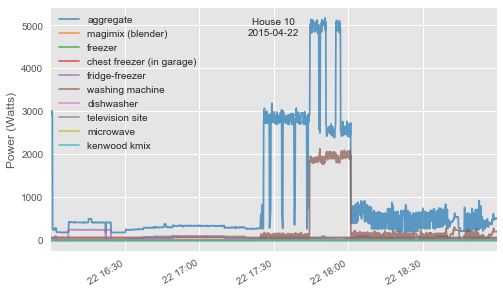

In [14]:
plot_day(10, datetime(2015,4,22,17), datetime(2015,4,22,20))

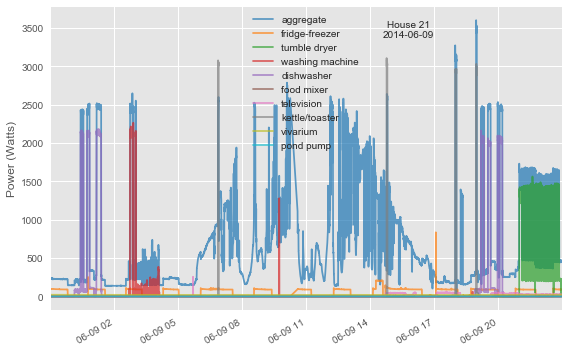

In [292]:
plot_day(21, datetime(2014,6,9), figsize=(8,5), text_x_location=0.7)
plt.tight_layout()
makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'house21_solar.pdf'))

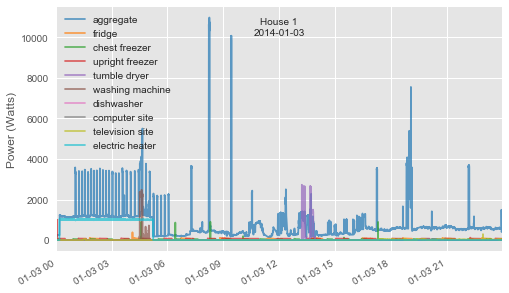

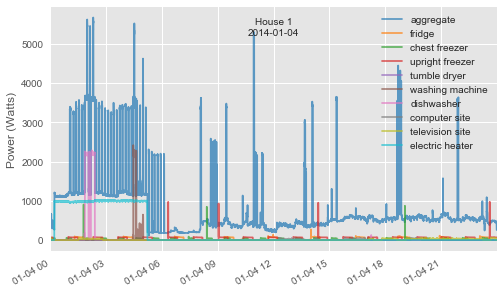

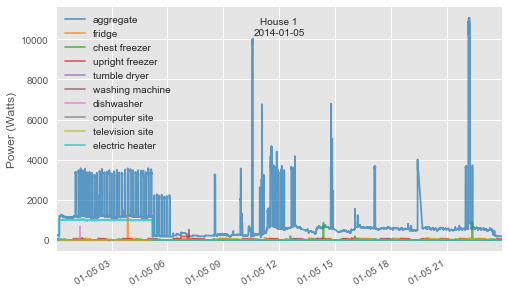

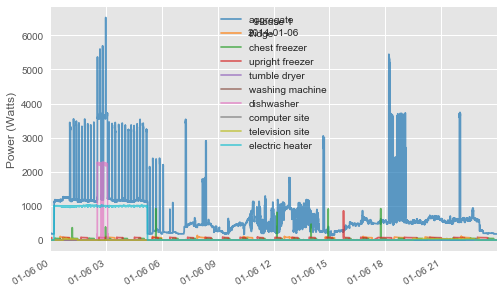

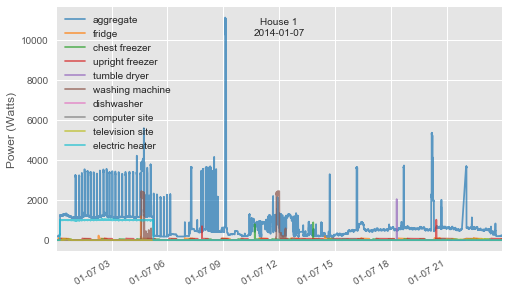

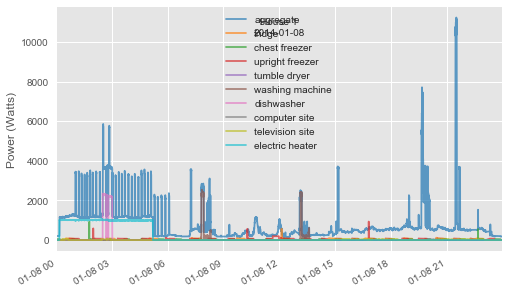

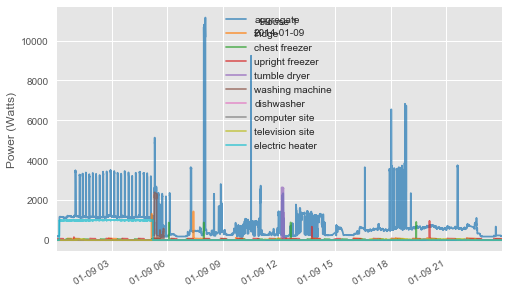

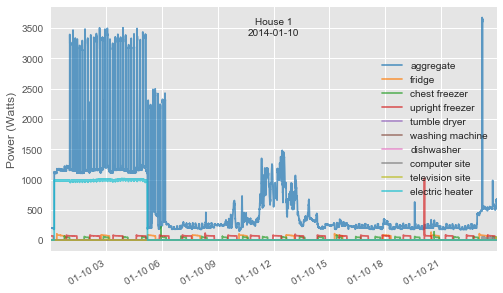

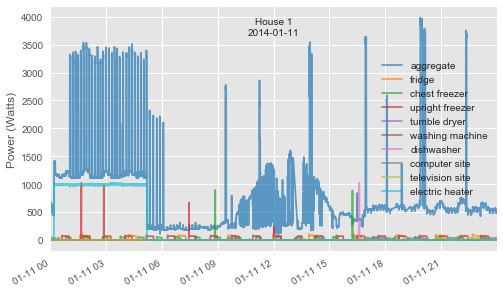

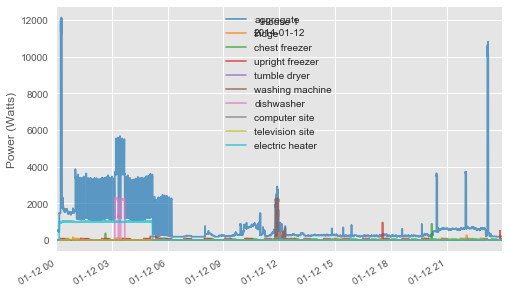

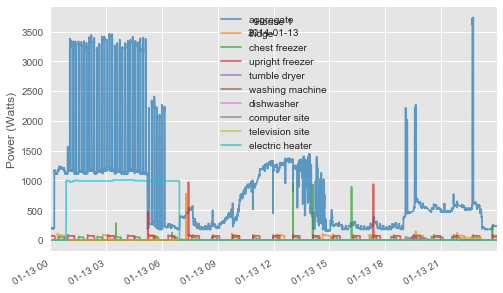

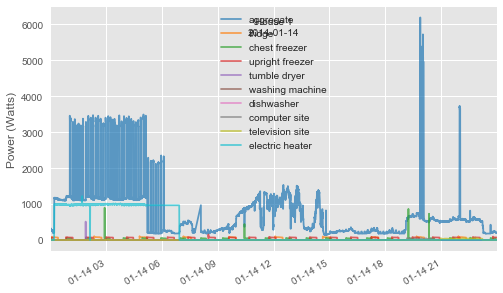

In [38]:
def plot_date_range(house_id, dt_base, day_range=range(-7, 5), app_names=None, figsize=(11,2)):
    '''
    Make multiple daily plots for a house within a date range.
    '''
    if isinstance(app_names, basestring):
        app_names = [app_names]  # if they were entered as string, convert to list for Pandas
    for day_delta in day_range:
        dt = dt_base + timedelta(days=day_delta)
        try:
            plot_day(house_id, dt, figsize=figsize, apps_to_plot=app_names)
        except TypeError:
            print 'no data for {}'.format(str(dt.date()))
            
            
plot_date_range(1, datetime(2014,1,10), figsize=(8,5))

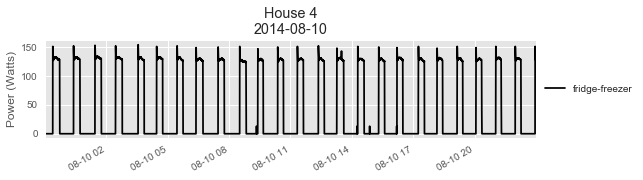

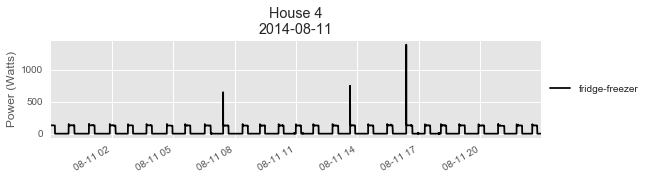

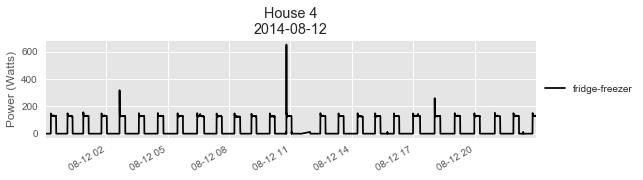

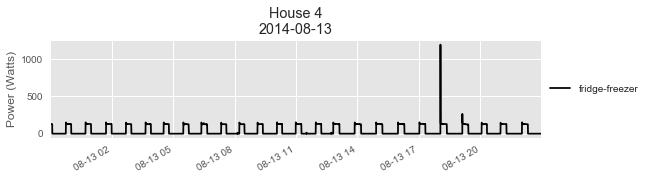

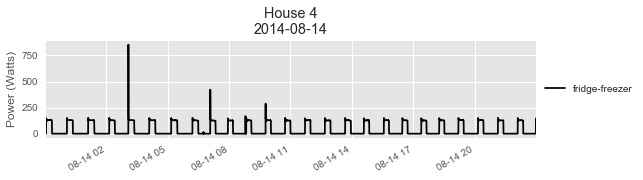

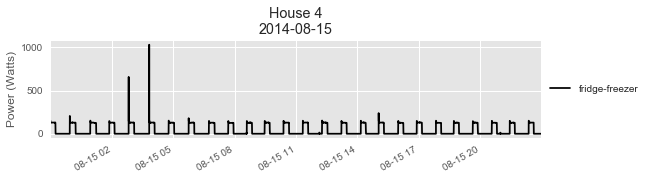

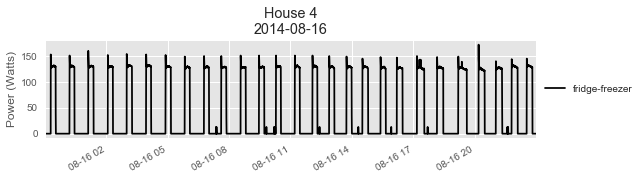

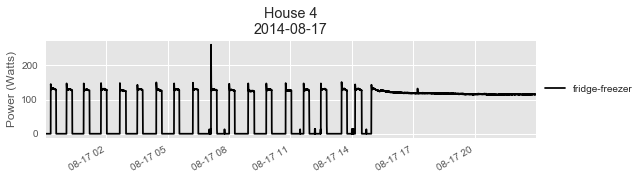

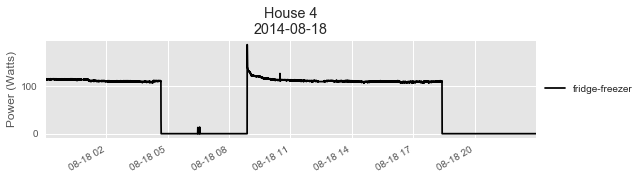

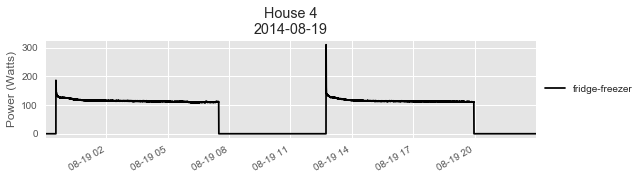

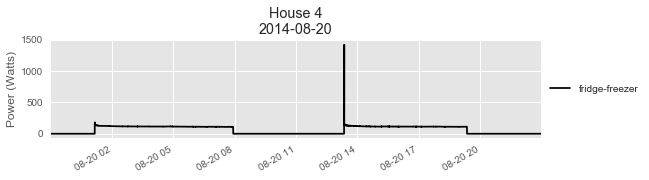

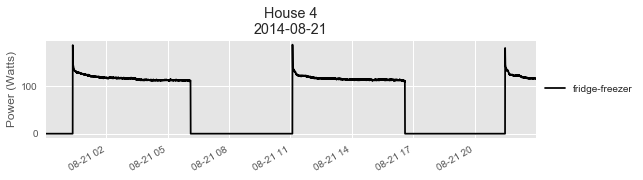

In [27]:
# Note change in fridge-freezer model.
plot_date_range(4, datetime(2014,8,17), app_names='fridge-freezer')
plt.savefig

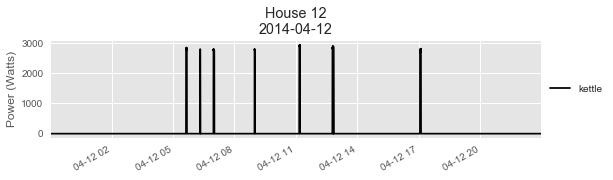

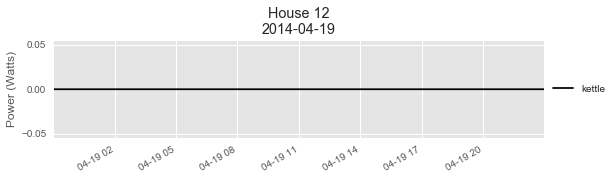

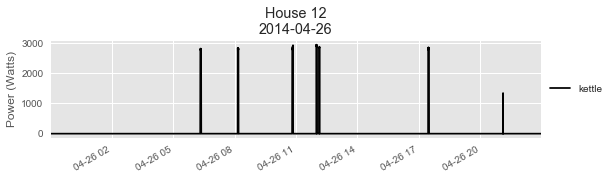

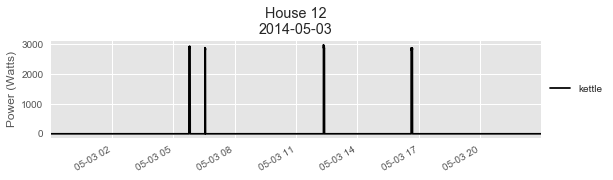

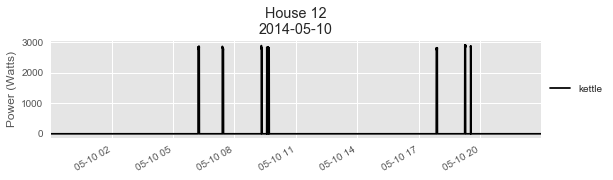

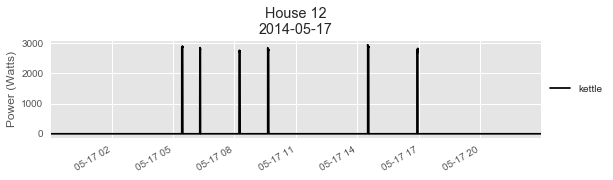

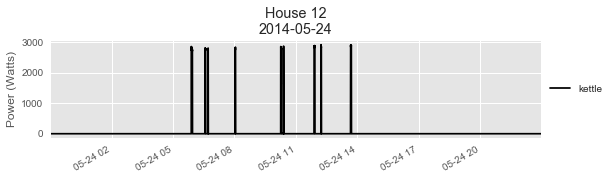

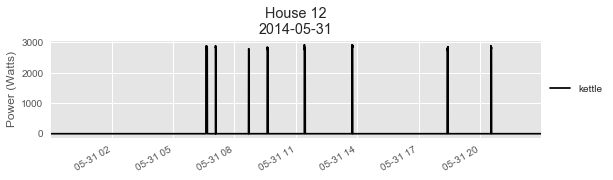

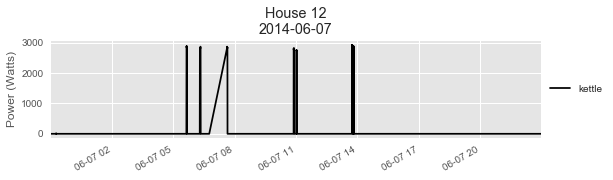

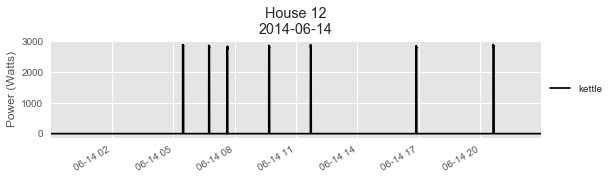

In [26]:
# Note how it appears to be a kettle and not a computer site.
def plot_date_range(house_id, dt_base, day_range=range(-7, 5), app_names=None, figsize=(11,2)):
    '''
    Make multiple daily plots for a house within a date range.
    '''
    if isinstance(app_names, basestring):
        app_names = [app_names]  # if they were entered as string, convert to list for Pandas
    for day_delta in day_range:
        dt = dt_base + timedelta(days=day_delta)
        try:
            plot_day(house_id, dt, figsize=figsize, cols=app_names)
        except TypeError:
            print 'no data for {}'.format(str(dt.date()))
            
plot_date_range(12, datetime(2014,5,17), day_range=np.array(range(-5,5))*7, app_names=['kettle'])

In [ ]:
# create_daily_plots(house_ids, dir_run)

In [38]:
# dstats = create_daily_stats(HOUSE_IDS,
#                             pkl_path=os.path.join(dir_data, 'stats_by_day.pkl'),
#                             nrow=None)

In [18]:
dstats = pd.read_pickle(os.path.join(dir_data, 'stats_by_day.pkl'))

In [279]:
# plot_day(2, datetime.datetime(2014,9,7), figsize=(11,8))

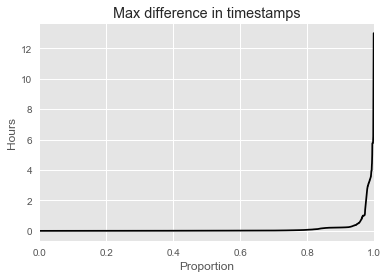

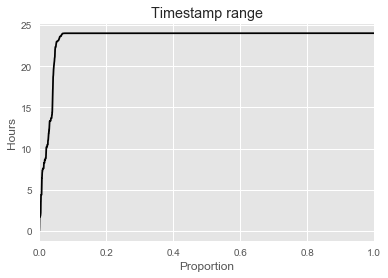

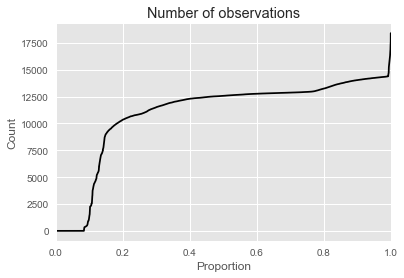

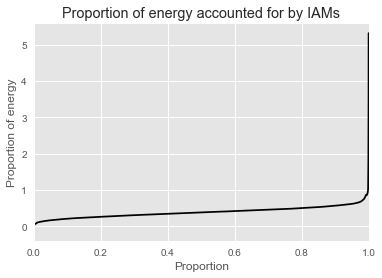

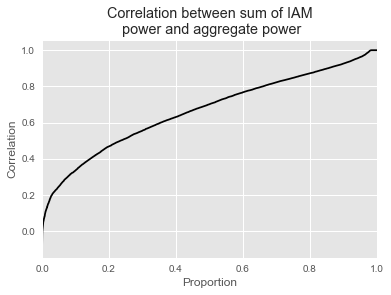

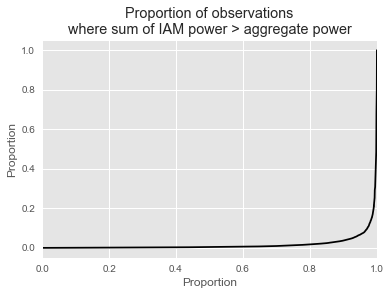

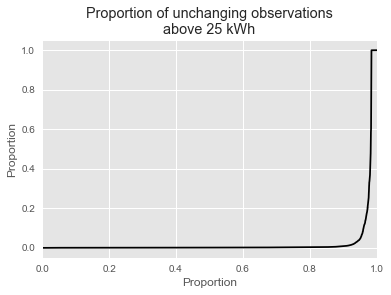

In [354]:
vars_to_plot = [{'col': ('UnixDiff', 'max'), 'ylab': 'Hours', 'title': 'Max difference in timestamps'},
                {'col': 'HourRange', 'ylab': 'Hours', 'title': 'Timestamp range'},
                {'col': ('RowNum', 'len'), 'ylab': 'Count', 'title': 'Number of observations'},
                {'col': ('PctAccountedEnergy', 'total'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for by IAMs'},
                # {'col': ('PctAccountedEnergy', 'std'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for\nby IAMs (standard dev.)'},
                {'col': 'SumToMainCorr', 'ylab': 'Correlation', 'title': 'Correlation between sum of IAM\n power and aggregate power'},
                {'col': ('Issues', 'mean'), 'ylab': 'Proportion', 'title': 'Proportion of observations\nwhere sum of IAM power > aggregate power'},
                {'col': ('Appliance0', 'prop_unchanging_large_value'), 'ylab': 'Proportion', 'title': 'Proportion of unchanging observations\nabove 25 kWh'}]
for var_to_plot in vars_to_plot:
    plot_data = pd.DataFrame({'X': sorted(dstats[var_to_plot['col']].dropna())})
    plot_data['Proportion'] = [i/plot_data.shape[0] for i in range(plot_data.shape[0])]
    ax = plot_data.set_index('Proportion').plot(color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_ylabel(var_to_plot['ylab'])
    ax.legend().set_visible(False)

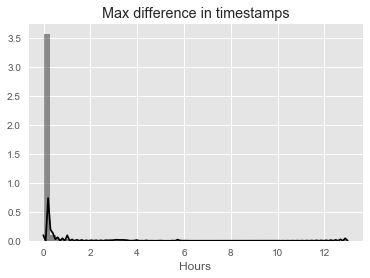

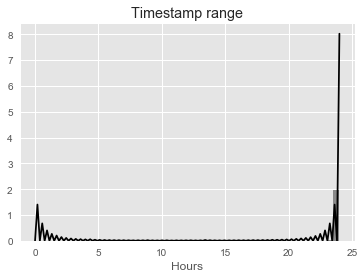

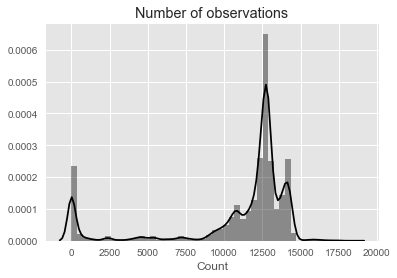

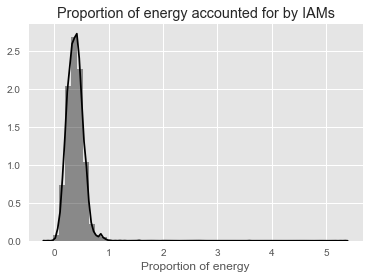

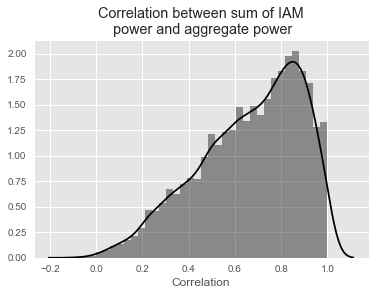

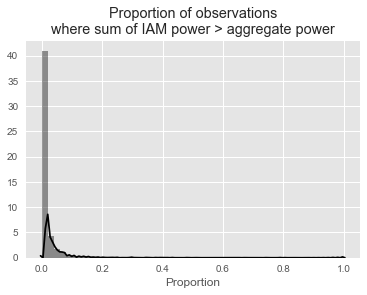

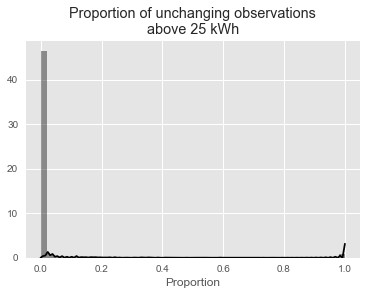

In [478]:
for var_to_plot in vars_to_plot:
    var_name = var_to_plot['col']
    kde_data = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).dropna().values
    ax = sns.distplot(kde_data, rug=False, color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_xlabel(var_to_plot['ylab'])
    plt.show()

In [ ]:
1

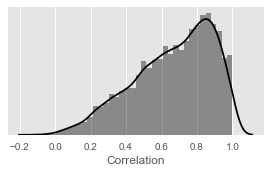

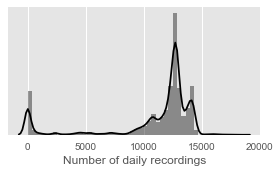

In [19]:
makedirs2(dir_run)
figsize=(4,2.5)

# Create plot for correlation.
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
kde_data = dstats['SumToMainCorr'].replace([np.inf, -np.inf], np.nan).dropna().values
ax = sns.distplot(kde_data, color='black')
ax.set_xlabel('Correlation')
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(dir_run, 'corr_dist.pdf'))
plt.show()

# Create plot for number of observations.
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
kde_data = dstats['RowNum'].replace([np.inf, -np.inf], np.nan).dropna().values
ax = sns.distplot(kde_data, color='black')
ax.set_xlabel('Number of daily recordings')
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(dir_run, 'num_obs_dist.pdf'))
plt.show()

In [ ]:
# Get NaN proportions.
for var_to_plot in vars_to_plot:
    x = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).values
    print '{0}: {1:0.2g}'.format(var_to_plot['col'], np.mean(np.isnan(x)))

Issues


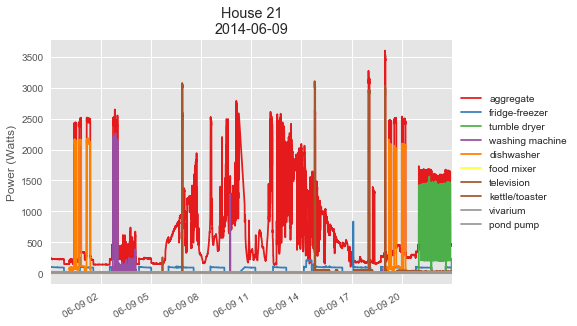

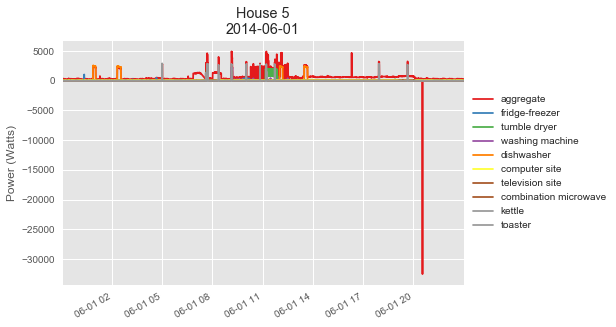

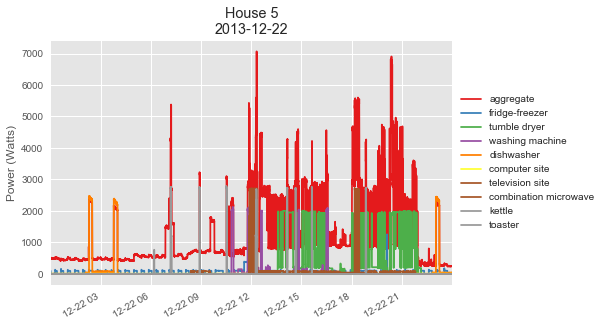

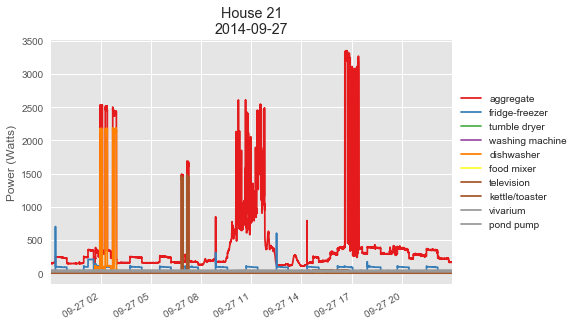

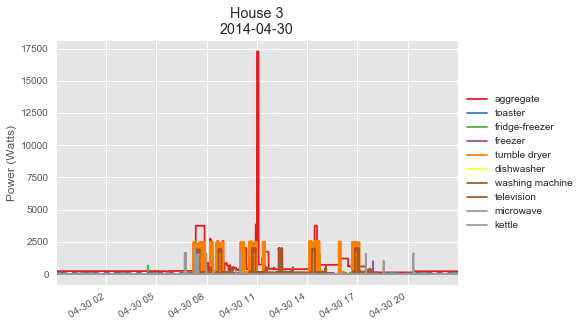

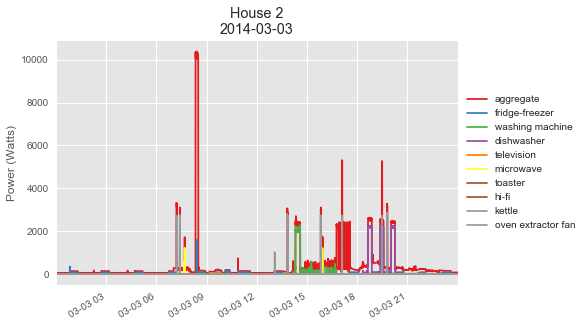

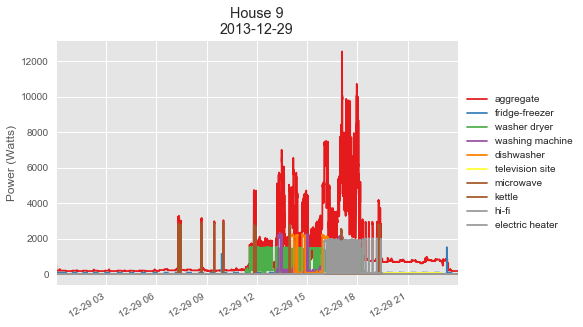

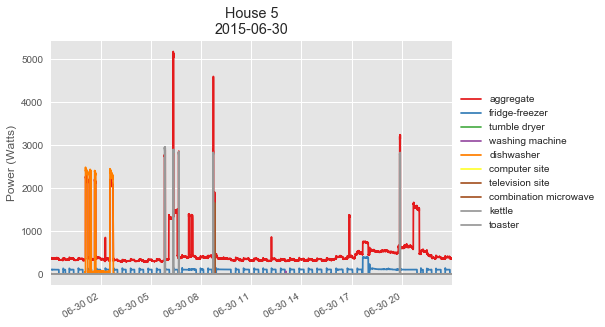

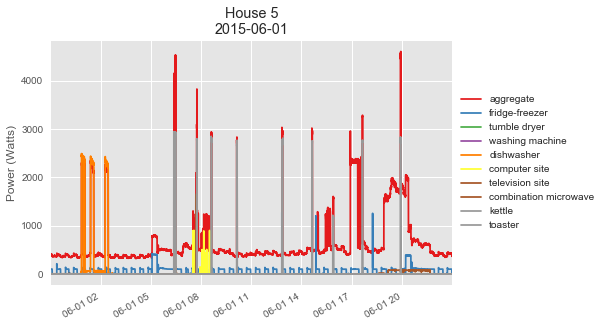

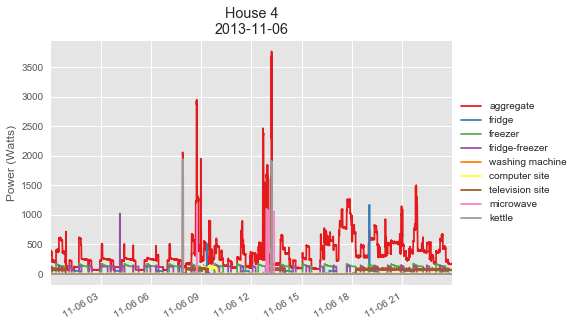

In [639]:
# %run create_data

def plot_samples(condition, n=10):
    sample = dstats.loc[condition].sample(n)
    dt_series = sample.index.to_datetime()
    house_ids = sample['House'].values
    for dt, house_id in zip(dt_series, house_ids):
        plot_day(dt=dt, house_id=house_id)
        plt.show()

np.random.seed(1)
# print 'UnixDiff'
# plot_samples(dstats[('UnixDiff', 'max')] > 0.25, 10)
# print 'HourRange'
# plot_samples(dstats['HourRange'] < 23.5, 10)
# print 'RowNum'
# plot_samples((np.isfinite(dstats[('RowNum', 'len')].values)) & (dstats[('RowNum', 'len')] < 2000), 10)
# print 'PctAccountedEnergy - identity'
# plot_samples(dstats[('PctAccountedEnergy', 'identity')] > float('inf'), 10)
# print 'PctAccountedEnergy - std'
# plot_samples(dstats[('PctAccountedEnergy', 'std')] > float('inf'), 10)
# print 'SumToMainCorr'
# plot_samples(dstats['SumToMainCorr'] < 0.20, 10)
print 'Issues'
plot_samples(dstats[('Issues', 'mean')] > 0.01, 10)
# print 'prop_unchanging_large_value'
# plot_samples((np.isfinite(dstats[('Appliance1', 'prop_unchanging_large_value')].values)) & \
#                  (dstats[('Appliance1', 'prop_unchanging_large_value')] > 0.05),
#              10)


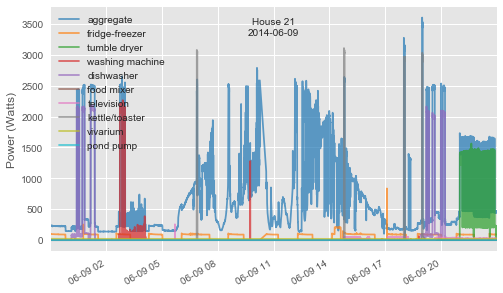

In [57]:
# Show solar day.
plot_day(21, datetime(2014,6,9))
makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'solar_day.pdf'))

In [424]:
# house_id = 16
# dt = datetime(2014,10,11)
# df = get_df(house_id=house_id, dt_start=dt)

In [462]:
# dstats.to_csv(os.path.join(dir_data, 'dstats_TEMP.csv'))

In [9]:
dstats = clean_daily_stats(dstats)

cleaning daily stats...
1013 (9.3%) rows affected in total, 1013 (9.3%) new | Condition 1 (('RowNum', 'len'))
750 (6.9%) rows affected in total, 650 (6%) new | Condition 2 (('UnixDiff', 'max'))
605 (5.6%) rows affected in total, 422 (3.9%) new | Condition 3 (HourRange)
284 (2.6%) rows affected in total, 246 (2.3%) new | Condition 4 (('Issues', 'mean'))
64 (0.59%) rows affected in total, 20 (0.18%) new | Condition 5 (HoursInDay)
9 (0.083%) rows affected in total, 7 (0.064%) new | Condition 6 (('Appliance0', 'min'))
0 (0%) rows affected in total, 0 (0%) new | Condition 7 (('Appliance1', 'min'))
159 (1.5%) rows affected in total, 122 (1.1%) new | Condition 8 (('Appliance1', 'prop_unchanging_large_value'))
0 (0%) rows affected in total, 0 (0%) new | Condition 9 (('Appliance2', 'min'))
105 (0.96%) rows affected in total, 35 (0.32%) new | Condition 10 (('Appliance2', 'prop_unchanging_large_value'))
0 (0%) rows affected in total, 0 (0%) new | Condition 11 (('Appliance3', 'min'))
114 (1%) rows

creating data for fridge...
creating data for kettle...
creating data for washing machine...
creating data for dishwasher...
creating data for microwave...


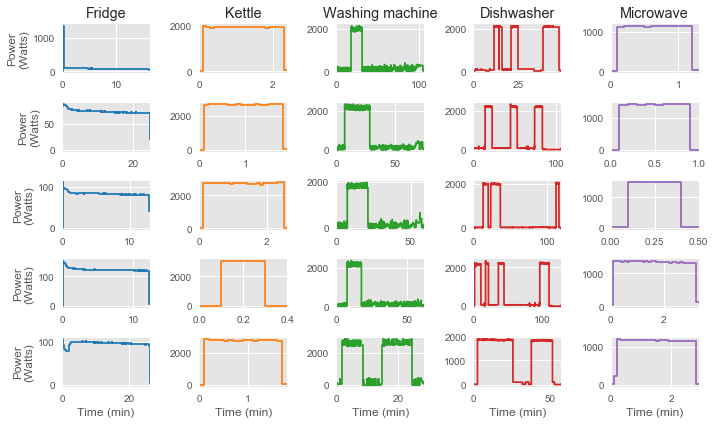

In [17]:
# Plot examples of activations.

np.random.seed(20170717)

n = 5  # number of samples
fig = plt.figure(figsize=(10,6))
cm = plt.cm.tab10  # colormap

gs = matplotlib.gridspec.GridSpec(len(APP_NAMES), n)

# plot_num = 0  # in total there are len(APP_NAMES) * n plots
for app_idx, app_name in enumerate(APP_NAMES):
    
    print 'creating data for {}...'.format(app_name)

    app_params = make_app_params_dict()[app_name]
    
    # Get combinations for viable house/appliance series.
    tups = get_house_app_tuples(app_name)
    
    # Sample n tuples.
    tup_idx = np.random.choice(range(len(tups)), n, replace=False)
    tups = [tups[i] for i in tup_idx]

    sample = 0  # sample number for the appliance
    for house_id, app_num in tups:
        
        # Get "chunk," which is NILM-speak for a power series.
        chunk = pd.Series(
            load_app(house_id, app_num),
            index=pd.to_datetime(load_ts(house_id), unit='s', utc=True)
        )
        
        x_all = get_activations(chunk, border=1, **app_params)
        x_idx = np.random.choice(range(len(x_all)))  # randomly choose one activation
        
        # Make index (plot x-axis) in minutes. Assumes consistent 6-sec sampling.
        x = x_all[x_idx].values
        x = pd.DataFrame({app_name: x})  # here appliance name doesn't matter
        x.index = x.index * 6 / 60  
        
        # Plot.
        ax = fig.add_subplot(gs[n*sample + app_idx])
        kwds = {'drawstyle': 'steps'}
        # kwds['color'] = cm(sample)
        x.plot(ax=ax, use_index=True, color=cm(app_idx), **kwds)
        if app_idx==0:
            ax.set_ylabel('Power\n(Watts)')
        if sample==n-1:
            ax.set_xlabel('Time (min)')
        if sample==0:
            ax.set_title(app_name.capitalize())
        ax.legend().set_visible(False)
        
        # plot_num += 1
        sample += 1
        
gs.tight_layout(fig)

makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'example_app_sigs.pdf'))

plt.show()

In [572]:
apps.loc[apps['WashingMachine']==1][['House', 'ApplianceNum']]
apps.loc[apps['ApplianceOrig_Raw'].str.lower().str.contains('washer')]

House  ApplianceNum     ApplianceOrig_Raw ApplianceOrig_Cleaned  \
6        1             6            Dishwasher            Dishwasher   
13       2             3            Dishwasher            Dishwasher   
25       3             5            Dishwasher            Dishwasher   
44       5             4            Dishwasher            Dishwasher   
53       6             3            Dishwasher            Dishwasher   
66       7             6            Dishwasher            Dishwasher   
82       9             2          Washer Dryer          Washer Dryer   
84       9             4            Dishwasher            Dishwasher   
96      10             6            Dishwasher            Dishwasher   
104     11             4            Dishwasher            Dishwasher   
124     13             4            Dishwasher            Dishwasher   
134     15             4            Dishwasher            Dishwasher   
146     16             6            Dishwasher            Dishwasher   
164     18             4  Washer Dryer(garage)  Washer Dryer(garage)   
166     18             6            Dishwasher            Dishwasher   
185     20             5            Dishwasher            Dishwasher   
194     21             4            Dishwasher            Dishwasher   

                Appliance  Discrepancy  Discrepancy_Important GuessOfCorrect  \
6              dishwasher            0                      0            NaN   
13             dishwasher            0                      0            NaN   
25             dishwasher            0                      0            NaN   
44             dishwasher            0                      0            NaN   
53             dishwasher            0                      0            NaN   
66             dishwasher            0                      0            NaN   
82           washer dryer            0                      0            NaN   
84             dishwasher            0                      0            NaN   
96             dishwasher            0                      0            NaN   
104            dishwasher            0                      0            NaN   
124            dishwasher            0                      0            NaN   
134            dishwasher            0                      0            NaN   
146            dishwasher            0                      0            NaN   
164  washer dryer(garage)            0                      0            NaN   
166            dishwasher            0                      0            NaN   
185            dishwasher            0                      0            NaN   
194            dishwasher            0                      0            NaN   

     Fridge  Kettle  WashingMachine  DishWasher  Microwave  
6         0       0               0           1          0  
13        0       0               0           1          0  
25        0       0               0           1          0  
44        0       0               0           1          0  
53        0       0               0           1          0  
66        0       0               0           1          0  
82        0       0               0           0          0  
84        0       0               0           1          0  
96        0       0               0           1          0  
104       0       0               0           1          0  
124       0       0               0           1          0  
134       0       0               0           1          0  
146       0       0               0           1          0  
164       0       0               0           0          0  
166       0       0               0           1          0  
185       0       0               0           1          0  
194       0       0               0           1          0

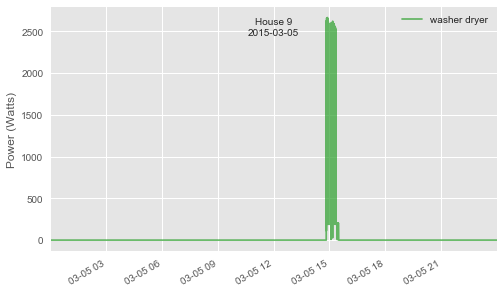

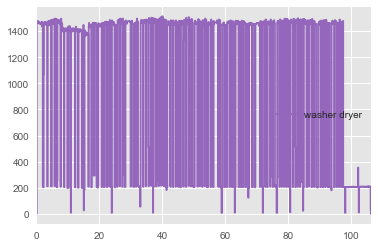

In [575]:
app_name_unstandard = 'washer dryer'  # for plot
app_name = 'washing machine'  # for params
n = 5
house_id = 9
app_num = 2
dt = datetime(2015,3,5)  # random

chunk = pd.Series(
    load_app(house_id, app_num),
    index=pd.to_datetime(load_ts(house_id), unit='s', utc=True)
)
x_all = get_activations(chunk, border=1, **make_app_params_dict()[app_name])
x_idx = np.random.choice(range(len(x_all)))  # randomly choose one activation
x = x_all[x_idx].values
x = pd.DataFrame({app_name_unstandard: x})  # here appliance name doesn't matter
x.index = x.index * 6 / 60  

# Make index (plot x-axis) in minutes. Assumes consistent 6-sec sampling.
kwds = {'drawstyle': 'steps'}
# kwds['color'] = cm(sample)
plot_day(house_id, dt, apps_to_plot=app_name_unstandard)
x.plot(use_index=True, color=cm(app_idx), **kwds)

In [576]:
sum([159,
105,
114,
45,
60,
91,
140,
7,
60])

781

In [578]:
781 / 650 * 6.0

7.209230769230769

creating data for fridge...
    number of activations: 204774
creating data for kettle...
    number of activations: 41719
creating data for washing machine...
    number of activations: 6577
creating data for dishwasher...
    number of activations: 4725
creating data for microwave...
    number of activations: 17080


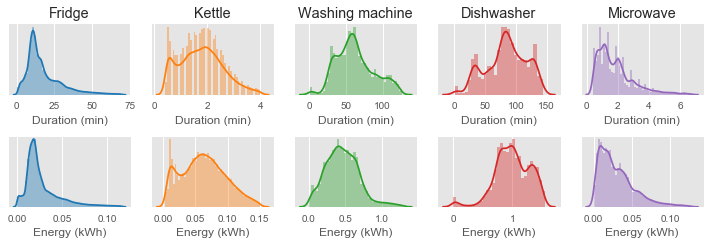

In [428]:
# Plot distributions of duration per activation and energy per activation.

WATTSEC_2_KWH = 1/3.6e6

# plot_type = {
#     'duration': lambda activation: len(activation) * 6 / 60,
#     'energy': lambda activation: sum(activation) * 6 * WATTSEC_2_KWH
# } 

n = None  # number of series to sample
# fig = plt.figure(figsize=(11,2))  # for one row
fig = plt.figure(figsize=(10,3.5))
cm = plt.cm.tab10  # colormap

gs = matplotlib.gridspec.GridSpec(nrows=2, ncols=len(APP_NAMES))

for app_idx, app_name in enumerate(APP_NAMES):

    print 'creating data for {}...'.format(app_name)

    app_params = make_app_params_dict()[app_name]

    # Get combinations for viable house/appliance series.
    tups = get_house_app_tuples(app_name)

    # Sample n tuples.
    if n is not None:
        tup_idx = np.random.choice(range(len(tups)), n, replace=False)
        tups = [tups[i] for i in tup_idx]

    chunks = []
    plot_num = 0  # per appliance
    for house_id, app_num in tups:

        # Get "chunk," which is NILM-speak for a power series.
        chunk = pd.Series(
            load_app(house_id, app_num),
            index=pd.to_datetime(load_ts(house_id), unit='s', utc=True)
        )

        chunks.extend(get_activations(chunk, border=1, **app_params))

    print '    number of activations: {}'.format(len(chunks))
    
    hist_kws = {'color': cm(app_idx)}
    kde_kws = {'color': cm(app_idx)}
        
    # Plot duration in minutes per activation.
    ax = fig.add_subplot(gs[app_idx])
    x = np.array(map(lambda activation: len(activation) * 6 / 60, chunks))
    x = x[x < np.percentile(x, 98)]
    ax = sns.distplot(x, ax=ax, hist_kws=hist_kws, kde_kws=kde_kws)
    ax.set_title(app_name.capitalize())
    ax.set_xlabel('Duration (min)')
    ax.get_yaxis().set_visible(False)
    
    # Plot energy per activation.
    ax = fig.add_subplot(gs[app_idx + len(APP_NAMES)])
    # ax = fig.add_subplot(gs[app_idx])
    x = np.array(map(lambda activation: sum(activation) * 6 * WATTSEC_2_KWH, chunks))
    x = x[x < np.percentile(x, 98)]
    ax = sns.distplot(x, ax=ax, hist_kws=hist_kws, kde_kws=kde_kws)
    # ax.set_title(app_name.capitalize())  # don't include this when plotting both duration and energy
    ax.set_xlabel('Energy (kWh)')
    ax.get_yaxis().set_visible(False)
    
    # ax.legend().set_visible(False)

gs.tight_layout(fig)

makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'app_energy_duration_dist.pdf'))
# plt.savefig(os.path.join(dir_run, 'app_energy_dist.pdf'))

plt.show()

In [126]:
x_all[x_idx].plot(color='black', ax=ax)

In [12]:
# get_energy(dstats, 1, datetime(2014,4,5), [1])

In [19]:
# %run create_data

get_app_nums(4, 'fridge')
# get_energy(dstats, 4, datetime.datetime(2013,10,12), [1, 3])

[1, 3]

In [484]:
# get_house_app_tuples('washing machine', True)

In [502]:
# agg.loc[agg['House']==house_id].loc[str(dt.date())]['Delete'].values[0]

In [36]:
# X, Y, x_house, x_date = create_data(HOUSE_IDS, app_names, dstats, dir_data)

/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


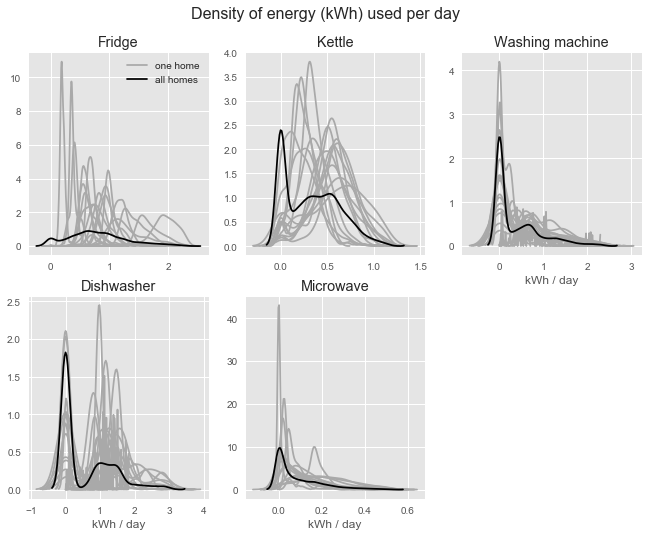

In [76]:
target_type = ['energy', 'activations'][0]
figsize=(11,8)

X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

Y = Y1 if target_type=='energy' else Y2
kde = target_type=='energy'
hist = target_type=='activations'
# kde = True
# hist = False

fig = plt.figure(figsize=figsize)
target_text = 'Density of energy (kWh) used per day' if target_type=='energy' else 'Histogram of activations per day'
fig.suptitle('{}'.format(target_text), size=16)
fig.subplots_adjust(top=0.9) 
gs = gridspec.GridSpec(2, 3)

house_ids_plot = list(set(x_house))
for i, app_name in enumerate(APP_NAMES):
    ax = fig.add_subplot(gs[i])
    y = pd.DataFrame({'Energy': [y_row[i] for y_row in Y],
                      'House': x_house})
    y = y[y['Energy'] < np.percentile(y['Energy'], 99)]
    if target_type == 'energy':
        for house_id_plot in house_ids_plot:
            if i == 0:
                label = 'one home' if house_id_plot == house_ids_plot[0] else None
            y_house = y.loc[y['House'] == house_id_plot]
            sns.distplot(y_house['Energy'].values, color='darkgray', label=label, kde=kde, hist=hist)
    ax.set_title('{}'.format(app_name.capitalize()))
    if i > 1:
        xlabel = 'Energy (kWh) / day)' if target_type=='energy' else 'No. of activations'
        ax.set_xlabel(xlabel)
    # ax.set_xlim(0,)
    all_homes_label = 'all homes' if i==0 else None
    sns.distplot(y['Energy'].values, color='black', label=all_homes_label, kde=kde, hist=hist)
# plt.tight_layout()
makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'app_densities_{}.pdf'.format(target_type)))
plt.show()

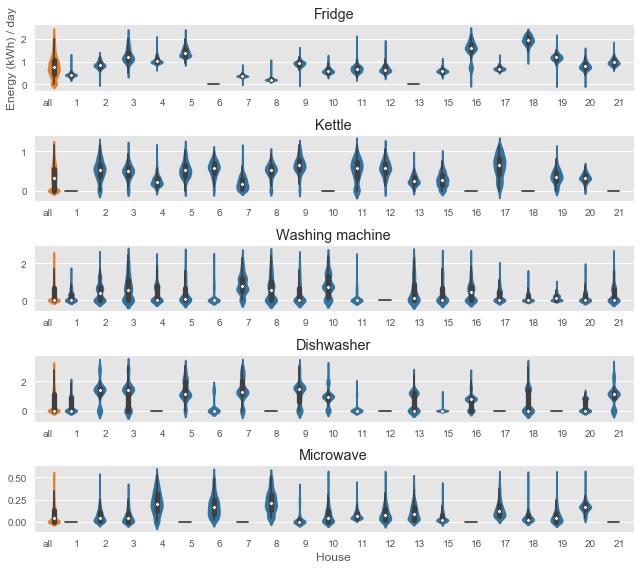

In [18]:
figsize=(9,8)

# X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
# Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
# x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

# Create value for all homes.
Y1 = np.vstack([Y1, Y1])
x_house = np.concatenate([['all']*len(x_house), map(str, x_house)])


fig = plt.figure(figsize=figsize)
# target_text = 'Density of energy (kWh) used per day' if target_type=='energy' else 'Histogram of activations per day'
# fig.suptitle('{}'.format(target_text), size=16)
# fig.subplots_adjust(top=0.9) 
gs = gridspec.GridSpec(5, 1)

house_ids_plot = list(set(x_house))
# for i, app_name in enumerate(APP_NAMES + ['all appliances']):
for i, app_name in enumerate(APP_NAMES):
    ax = fig.add_subplot(gs[i])
    fn = sum if app_name == 'all appliances' else lambda x: x[i]
    df = pd.DataFrame({'Energy': [fn(y_row) for y_row in Y1],
                       'House': x_house})
    df['IsAll'] = df['House']=='all'
    df = df[df['Energy'] < np.percentile(df['Energy'], 99)]
    if app_name=='fridge':
        df_fridge = df.copy()
    ax = sns.violinplot(x='House', y='Energy', hue='IsAll', data=df, palette=sns.color_palette('tab10', 10))
#     ax = sns.violinplot(x='House', y='Energy', data=df, scale='width', color='gray')
    ax.legend_.remove()
    ax.set_title('{}'.format(app_name.capitalize()))
    xlabel = 'House' if i==len(APP_NAMES)-1 else ''
    ax.set_xlabel(xlabel)
    if i==0:
        ax.set_ylabel('Energy (kWh) / day')
    else:
        ax.set_ylabel('')
plt.tight_layout()
makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'energy_densities_by_house_app.pdf'))
plt.show()

# df = pd.DataFrame(Y1)
# df.columns = APP_NAMES
# df['all'] = df.sum(axis=1)
# df['House'] = x_house
# df = pd.melt(df, id_vars=['House'], var_name='Appliance', value_name='Energy')
# g = sns.FacetGrid(df, row='Appliance', size=2.5, aspect=4, sharey=False)
# g = g.map(sns.violinplot, 'House', 'Energy', scale='width', color='gray')

In [423]:
df_fridge.groupby('House').median().sort_values('Energy')

Energy  IsAll
House                 
13     0.000000  False
6      0.000000  False
8      0.197182  False
7      0.362368  False
1      0.410451  False
15     0.575068  False
10     0.590036  False
12     0.642681  False
11     0.680320  False
17     0.688048  False
all    0.748200   True
20     0.792626  False
2      0.843048  False
9      0.921615  False
21     0.957779  False
4      1.005511  False
19     1.183374  False
3      1.203815  False
5      1.386760  False
16     1.582341  False
18     1.935569  False

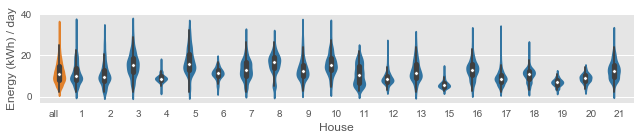

In [406]:
fig = plt.figure(figsize=(9,2))
ax = fig.add_subplot(111)
df1 = pd.DataFrame({'Energy': dstats[('EnergyAppliance0', 'sum')],
                    'House': dstats['House']})
df2 = df1.copy()
df2['House'] = 'all'
df = pd.concat([df2, df1])  # all first
del df1, df2

# y = y[y['Energy'] < np.percentile(y['Energy'], 95)]
# print y
not_too_big   = df['Energy'] < np.percentile(df['Energy'].dropna(), 99)
not_too_small = df['Energy'] > np.percentile(df['Energy'].dropna(), 1)
df = df[(not_too_big) & (not_too_small)]
df['IsAll'] = df['House']=='all'
sns.violinplot(x='House', y='Energy', hue='IsAll', data=df, palette=sns.color_palette('tab10', 10))
# ax.set_title('Total energy used per day, by house')
ax.legend_.remove()
ax.set_xlabel('House')
ax.set_ylabel('Energy (kWh) / day')
plt.tight_layout()
plt.savefig(os.path.join(dir_run, 'energy_densities_by_house.pdf'))
plt.show()

In [411]:
df.groupby('House').median().sort_values('Energy')

Energy  IsAll
House                  
15      5.621910  False
19      6.976821  False
12      8.362149  False
17      8.743342  False
4       8.791605  False
20      9.007943  False
2       9.695587  False
1       9.840407  False
11     10.376331  False
all    10.901269   True
18     10.976078  False
6      11.441167  False
13     11.679438  False
9      12.264611  False
21     12.507911  False
7      13.008193  False
16     13.144651  False
10     15.270113  False
3      15.498717  False
5      15.942279  False
8      16.697905  False

In [40]:
# # One day with negative aggregate.
# plot_day(3, datetime(2014,4,6))

5


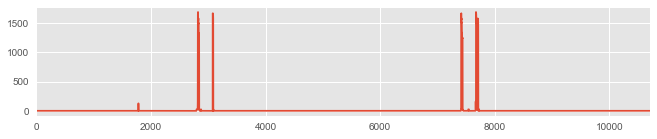

In [576]:
# Test code that gets number of activations.
house_id = 8
app_name = 'microwave'
dt_start = datetime(2014,9,25)

params = make_app_params_dict()[app_name]
app_num = get_app_nums(house_id, app_name)[0]

ts_series = load_ts(house_id)
aligned_arrays, ts_mask = get_aligned_ts_mask_for_day(ts_series, dt_start, 6)

app_power = load_app(house_id, app_num)[ts_mask]
print get_num_activations(app_power,
                          ts_series[ts_mask],
                          params)

plot_series(app_power, figsize=(11,2))

In [153]:
# Plot num activations vs energy.
dir_real_old = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/data/for_model/real'
dir_real_new = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/run/2017-06-28/real'
dat_old = np.load(os.path.join(dir_real_old, 'Y.npy'))
# dat_old = np.load(os.path.join(dir_real_new, 'Y1.npy'))
dat_new = np.load(os.path.join(dir_real_new, 'Y1.npy'))

dat_new

array([[ 0.41592917,  0.        ,  0.        ,  0.88252639,  0.        ],
       [ 0.31927667,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.31819111,  0.        ,  0.        ,  0.        ,  0.        ],
       ..., 
       [ 2.23197417,  0.        ,  0.        ,  1.46398306,  0.        ],
       [ 2.23187083,  0.        ,  0.        ,  1.46391528,  0.        ],
       [ 2.23194833,  0.        ,  0.        ,  1.46396611,  0.        ]])

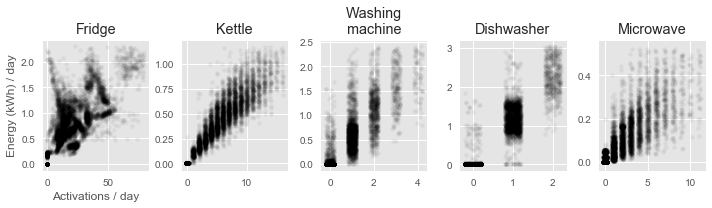

In [502]:
figsize = (10,3)
house_id = None  # number or None (for no highlighting)
colormap = plt.cm.tab10
truncate = True
lowess = False
fit_reg = house_id is not None

# X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
# x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

fig = plt.figure(figsize=figsize)
gs = gridspec.GridSpec(1, 5)

for idx, app_name in enumerate(APP_NAMES):
    ax = fig.add_subplot(gs[idx])
    # ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1, 2)])
    x = Y2[:,idx]
    y = Y1[:,idx]
    extreme = (x > np.percentile(x, 99)) | (y > np.percentile(y, 99))
    x = x[~extreme]
    y = y[~extreme]
    h = x_house[~extreme]
    regplot_args = {}
    if house_id is not None:
        color = h==house_id
        sns.regplot(x[~color], y[~color], color=colormap(0), x_jitter=.2, fit_reg=fit_reg, lowess=lowess, truncate=truncate, scatter_kws={'alpha': 0.05, 's': 20})
        sns.regplot(x[color], y[color], color=colormap(1), x_jitter=.2, fit_reg=fit_reg, lowess=lowess, truncate=truncate, scatter_kws={'alpha': 0.2, 's': 20})
    else:
        sns.regplot(x, y, color='black', x_jitter=.2, fit_reg=fit_reg, lowess=lowess, truncate=truncate, scatter_kws={'alpha': 0.05, 's': 20})
    ax.set_title(('washing\nmachine' if app_name=='washing machine' else app_name).capitalize())
    ylabel = 'Energy (kWh) / day' if idx in [0] else '' #  [0,3] else ''
    xlabel = 'Activations / day' if idx==0 else ''
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    # plt.hexbin(dat_old[:,idx], dat_new[:,idx], bins='log')

# fig.suptitle('Relationship between energy and number of activations', size=16)
gs.tight_layout(fig)
# fig.subplots_adjust(top=0.9)

# gs.update(hspace=0.1)  # more space between subplots, but doesn't seem to work

makedirs2(dir_run)
filename = 'corr_scatter.pdf' if house_id is None else 'corr_scatter_house_{}.pdf'.format(house_id)
plt.savefig(os.path.join(dir_run, filename))
plt.show()

In [18]:
corrs

all         1         2         3         4         5  \
Fridge           0.708906  0.618290  0.541090 -0.787876 -0.225610 -0.853573   
Kettle           0.932625       NaN  0.943804  0.866423  0.905516  0.911957   
Washing machine  0.861012  0.937413  0.914015  0.963428  0.682751  0.828937   
Dishwasher       0.940289  0.982233  0.878267  0.954010       NaN  0.931164   
Microwave        0.812651       NaN  0.824564  0.722811  0.889982       NaN   

                        6         7         8         9    ...           11  \
Fridge                NaN -0.137001  0.458468  0.122096    ...     0.240760   
Kettle           0.921023  0.946671  0.931345  0.934407    ...     0.929457   
Washing machine  0.943547  0.911825  0.888820  0.941520    ...     0.768979   
Dishwasher       0.981541  0.949294       NaN  0.815850    ...     0.768978   
Microwave        0.804916       NaN  0.834586  0.588682    ...     0.844868   

                       12        13        15        16        17        18  \
Fridge           0.471409       NaN  0.233283  0.573503  0.639462  0.405085   
Kettle           0.837055  0.884097  0.940375       NaN  0.931057       NaN   
Washing machine       NaN  0.941822  0.856841  0.937219  0.871597  0.902968   
Dishwasher            NaN  0.967291  0.767592  0.938649       NaN  0.988364   
Microwave        0.796678  0.817818  0.787730       NaN  0.783812  0.743301   

                       19        20        21  
Fridge          -0.194688 -0.838710  0.115625  
Kettle           0.894122  0.831025       NaN  
Washing machine  0.784422  0.931766  0.937436  
Dishwasher            NaN  0.996554  0.981786  
Microwave        0.855479  0.691637       NaN  

[5 rows x 21 columns]

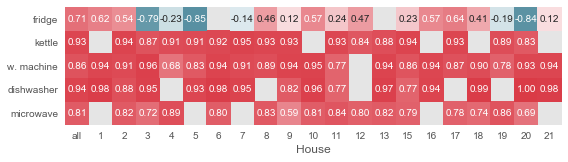

In [25]:
Y1 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y1.npy'))
Y2 = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y2.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))

Y1 = np.vstack([Y1, Y1])
Y2 = np.vstack([Y2, Y2])
x_house = np.concatenate([x_house, [-1]*len(x_house)])  # -1 is house_id code for all houses

fig = plt.figure(figsize=(8,2.5))
ax = fig.add_subplot(111)

corrs = []

# Now house by house.
for house_id in [-1] + HOUSE_IDS:  # start with all
    corr_house = []
    for idx in range(len(APP_NAMES)):
        try:
            corr_house.append(np.corrcoef(Y1[:,idx][x_house==house_id],
                                          Y2[:,idx][x_house==house_id])[0,1])
        except RuntimeWarning:
            corr_house.append(None)
    corrs.append(corr_house)
    
corrs = pd.DataFrame(corrs)
corrs.columns = ['w. machine' if a=='washing machine' else a for a in APP_NAMES]
# corrs.columns = map(lambda x: x.capitalize(), APP_NAMES)
corrs.index = ['all'] + HOUSE_IDS  # start with all
corrs = corrs.T

del Y1, Y2, x_house

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrs, square=True, annot=True, cmap=cmap, cbar_kws={"shrink": 0.9}, vmin=-1, vmax=1, fmt='0.2f', cbar=False)

# ax.set_title('Correlation between energy and number of activations')
ax.set_xlabel('House')

fig.tight_layout()

makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'corr_heatmap.pdf'))

plt.show()

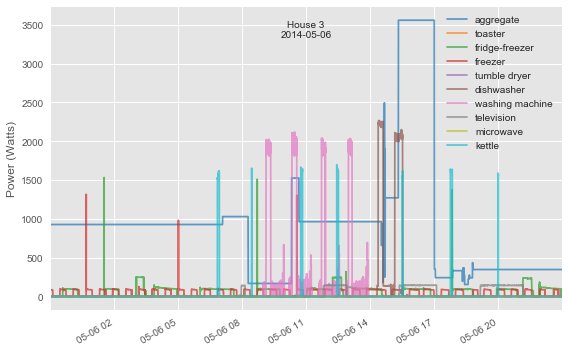

In [579]:
plot_day(3, date_to_datetime(datetime(2014,5,6)))
plt.tight_layout()
makedirs2(dir_run)
plt.savefig(os.path.join(dir_run, 'repeat_values_day.pdf'))

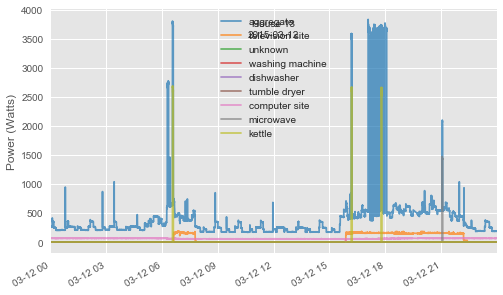

In [288]:
row = dstats.loc[(dstats['Delete']==0) & (~dstats['House'].isin(HOUSE_IDS_SOLAR))].sample(1)['House']
house_id = row.values[0]
dt = date_to_datetime(row.index[0])
plot_day(house_id, dt)
# plt.savefig(os.path.join(dir_run, 'example_day.pdf'))

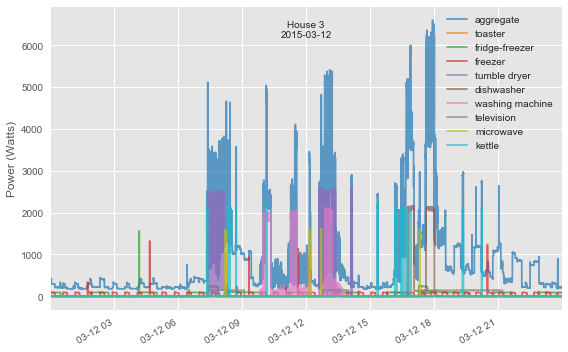

In [511]:
plot_day(3, datetime(2015,3,12))
plt.tight_layout()
plt.savefig(os.path.join(dir_run, 'example_day.pdf'))

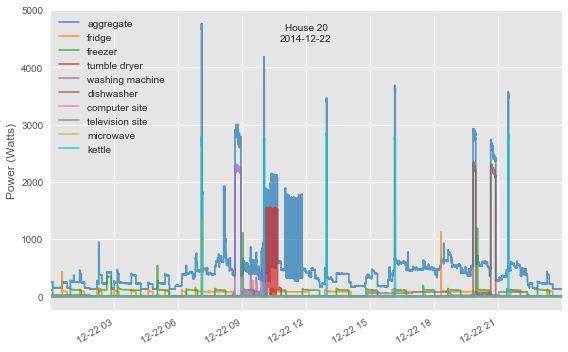

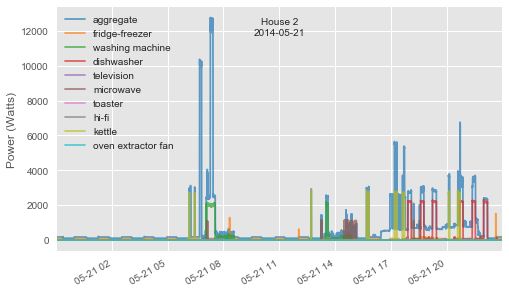

In [290]:
# Just getting a good example of a day for the Introduction of the paper.

# plot_day(5, date_to_datetime(datetime(2014,5,6)))  # RANDOM but good example
# plt.savefig(os.path.join(dir_run, 'example_day.pdf'))

plot_day(20, date_to_datetime(datetime(2014,12,22)))  # Good predictions
plt.tight_layout()
plt.savefig(os.path.join(dir_run, 'example_day.pdf'))

plot_day(2, date_to_datetime(datetime(2014,5,21)))  # Bad predictions
# plt.savefig(os.path.join(dir_run, 'example_day.pdf'))


number of obs: 108
0


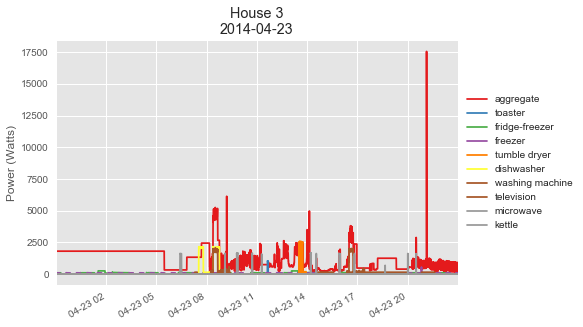

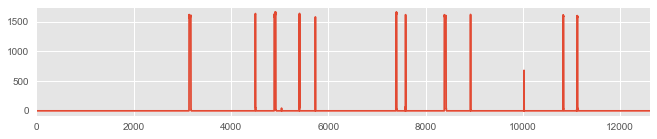

0


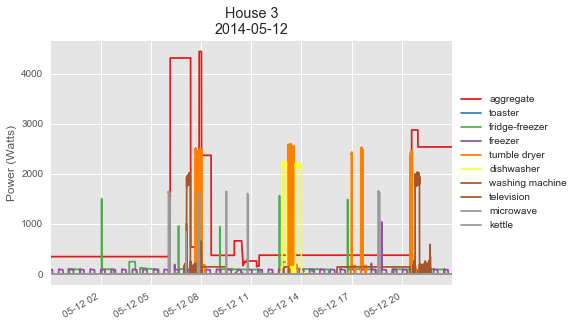

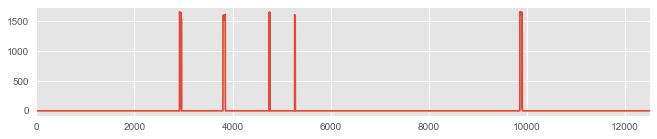

0


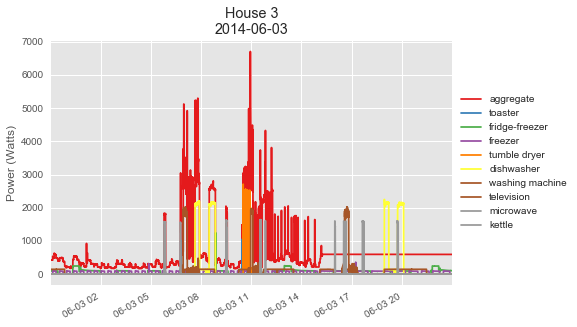

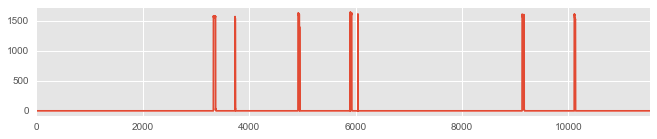

0


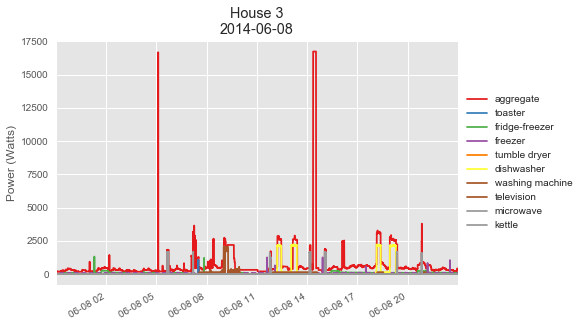

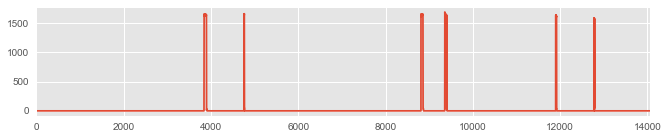

0


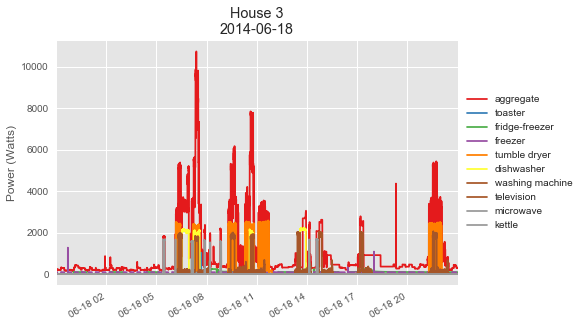

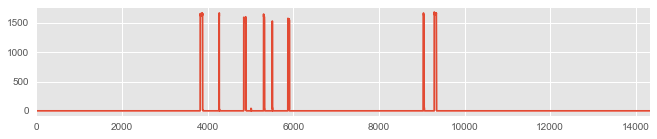

In [717]:
# # fridge
# app_idx = 0
# bad_idx = np.where(Y2[:,app_idx] == 1)[0]
# # bad_idx = np.where(Y2[:,app_idx] == 12)[0]

# # dishwasher
# app_idx = 3
# bad_idx = np.where((Y1[:,app_idx] > 30) & (Y2[:,app_idx] < 1))[0]

# kettle
app_idx = 1
bad_idx = np.where((Y1[:,app_idx] > 0.5) & (Y2[:,app_idx] == 0))[0]

# # washing machine
# app_idx = 2
# bad_idx = np.where((Y1[:,app_idx] > 5) & (Y2[:,app_idx] < 3))[0]

print 'number of obs: {}'.format(len(bad_idx))
app_name = APP_NAMES[app_idx]
    
# plot_series(X[(x_house == house_id) & (x_date == d)][0])

app_params_house_3 = make_app_params_dict()

for idx in bad_idx[:5]:
    
    house_id = x_house[idx]
    d = x_date[idx]
    
    app_nums = get_app_nums(house_id, app_name)
    if len(app_nums) > 1:
        print 'WARNING: more than two of this app in this home'
    
    ts_series = load_ts(house_id)
    ts_mask = get_ts_mask(ts_series, date_to_datetime(d))
    app_power = load_app(house_id, app_nums[0])[ts_mask]
    
    print get_num_activations(app_power, ts_series[ts_mask], app_params[app_name])
    
    plot_day(house_id, date_to_datetime(d))
    plt.show()
    plot_series(app_power)
    plt.show()

In [218]:
house_id = 13
dt = datetime(2014,4,7)
_, ts_mask = get_aligned_ts_mask_for_day(load_ts(13), dt, 6)
np.mean(load_issues(13)[ts_mask])

0.24904153354632588

In [721]:
# plt.close()
# for x, house_id, d in zip(X, x_house, x_date):
#     plot_series(x)
#     plot_day(house_id=house_id, dt=date_to_datetime(d))
#     plt.show()

number of rows: 1462
delete: 1


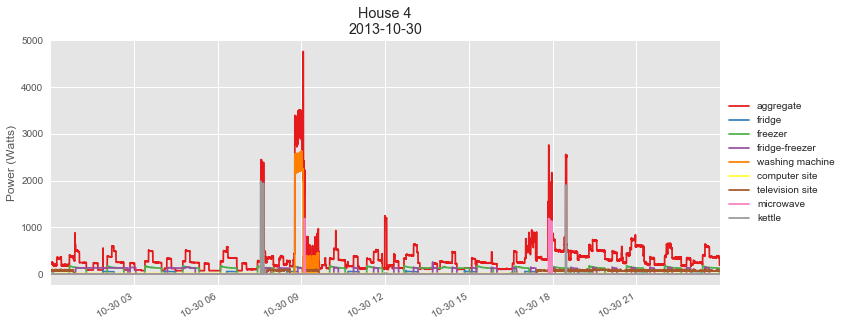

delete: 0


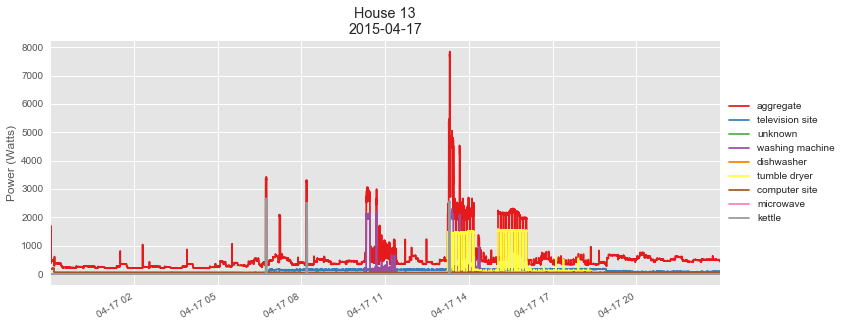

delete: 0


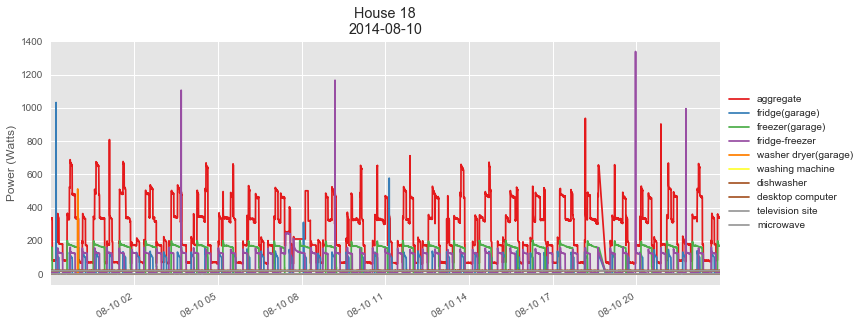

delete: 1


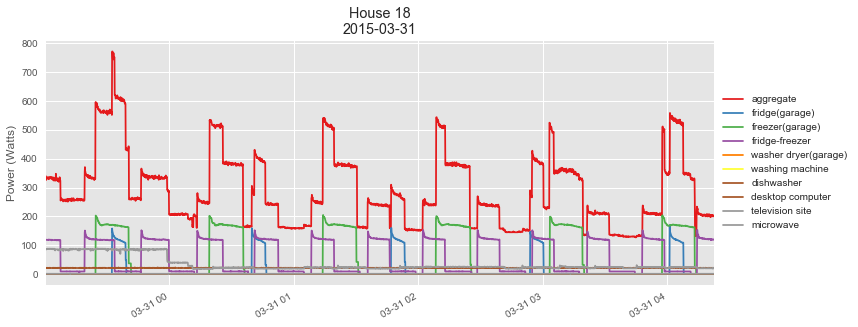

delete: 0


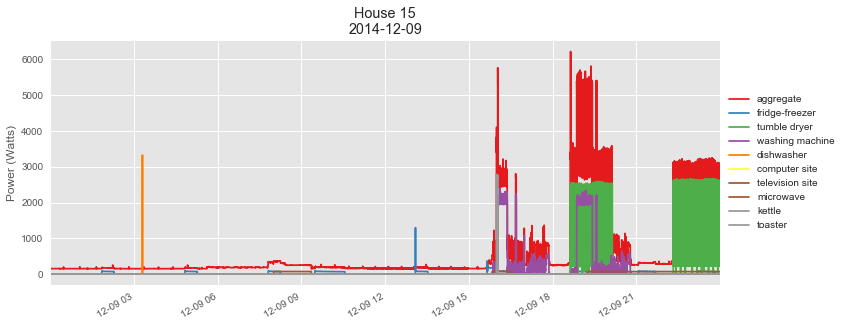

delete: 1


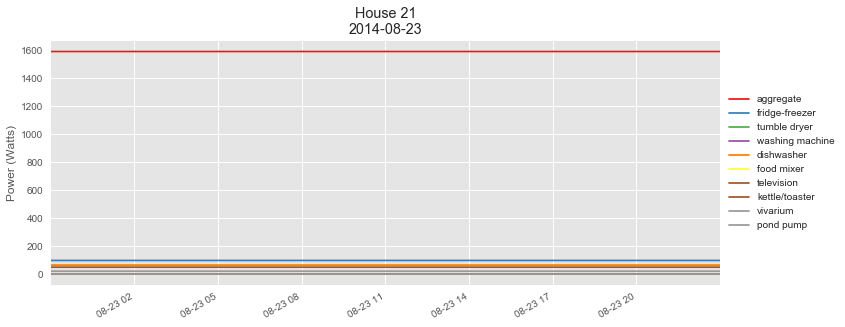

delete: 0


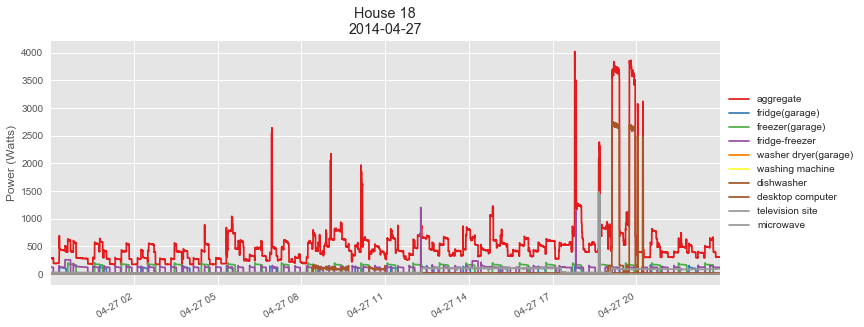

delete: 0


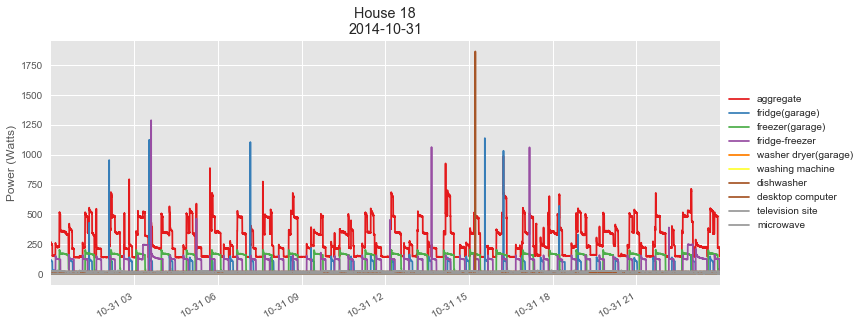

delete: 0


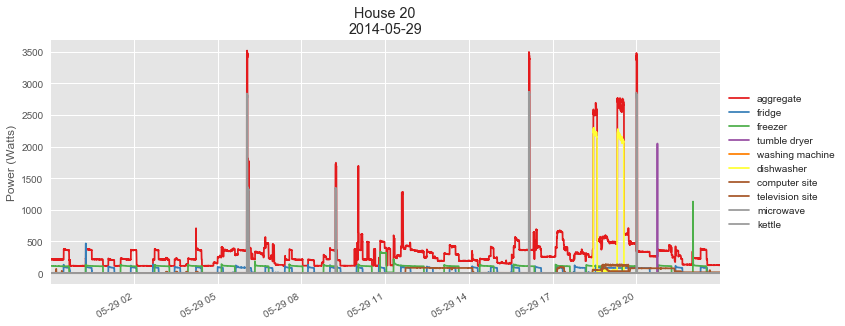

delete: 0


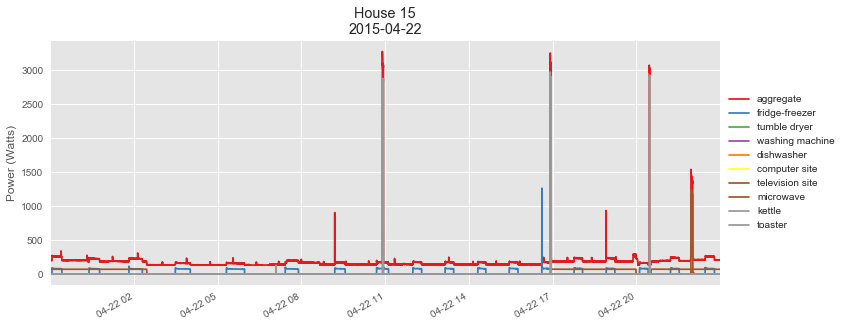

delete: 1


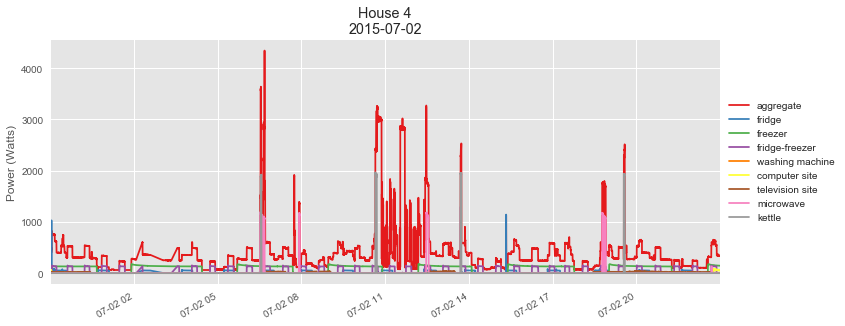

delete: 0


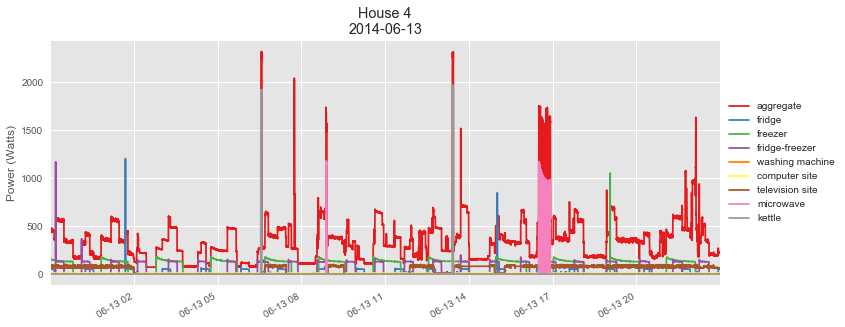

delete: 1


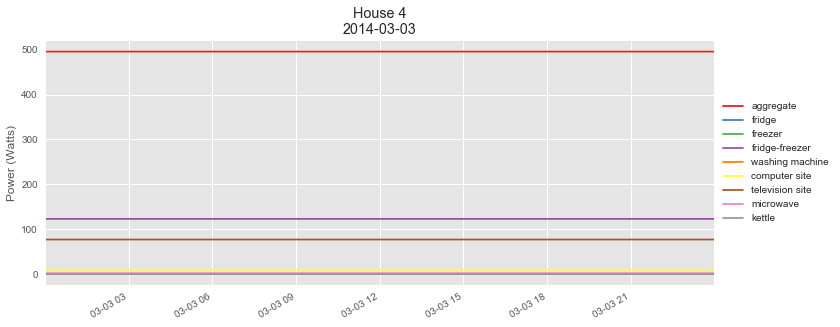

delete: 0


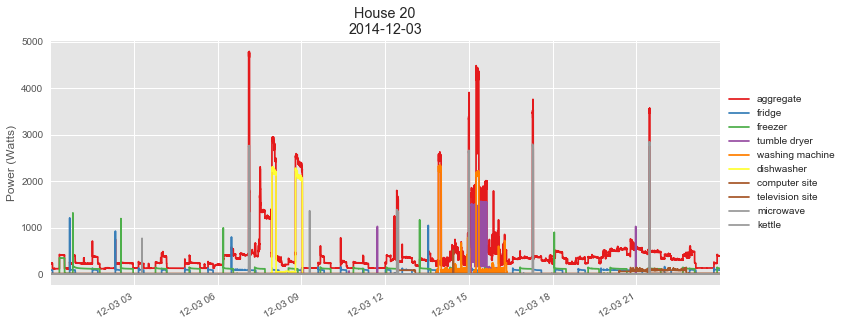

delete: 0


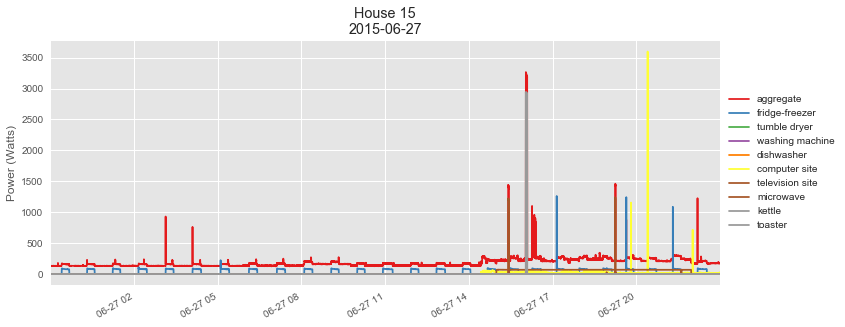

delete: 1


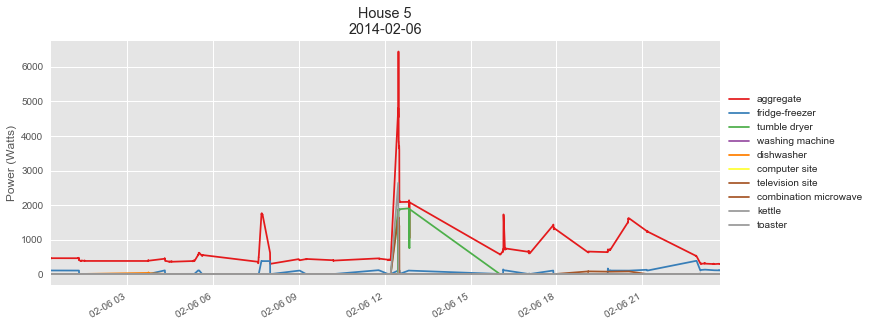

delete: 1


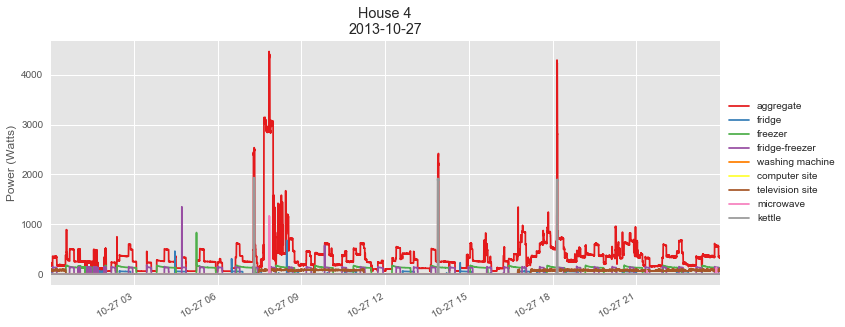

delete: 1


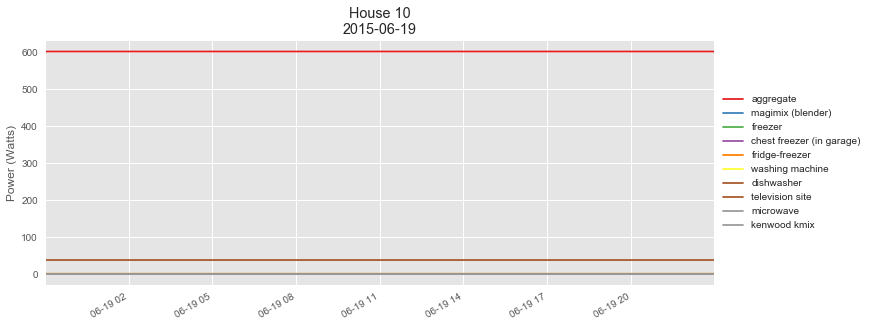

delete: 0


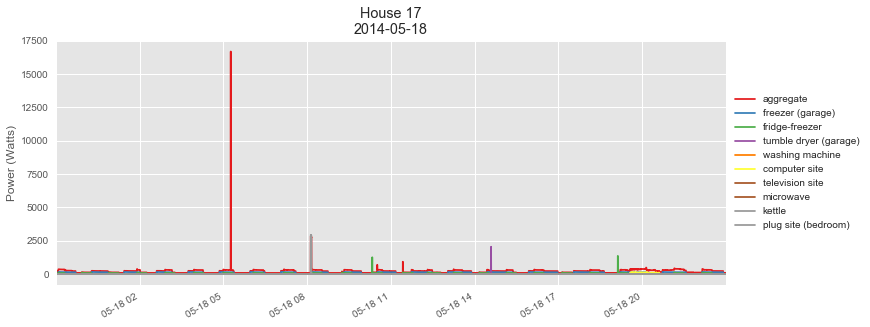

delete: 0


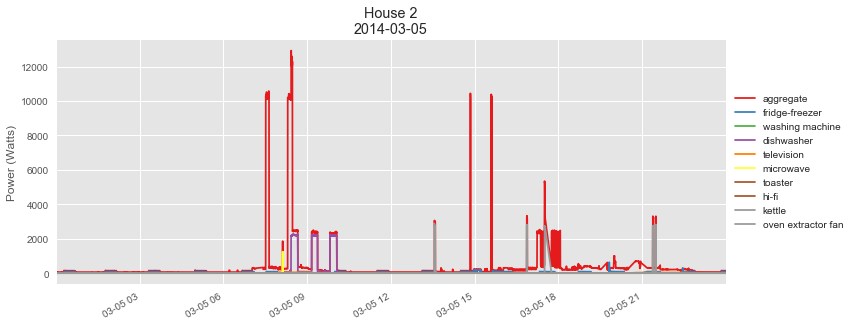

In [20]:
def plot_days_with_conditions(dstats, dstats_cond, max_to_plot=10):
    
    dstats_sub = dstats.loc[dstats_cond]
    print 'number of rows: {}'.format(dstats_sub.shape[0])

    num_to_plot = min(max_to_plot, dstats_sub.shape[0])
    sample = dstats_sub.sample(num_to_plot)

    dt_series = sample.index.to_datetime()
    house_ids = sample['House'].values
    
    for dt, house_id in zip(dt_series, house_ids):
        delete = dstats.loc[(dstats['House']==house_id) & (dstats.index==dt)]['Delete'].values[0]
        print 'delete: {}'.format(delete)
        plot_day(dt=dt, house_id=house_id, figsize=(15,5))
        plt.show()
        
# plot_days_with_conditions(   
#     dstats,
#     dstats[('Appliance2', 'prop_unchanging_large_value')] > 0.1,
#     max_to_plot=10
# )

plot_days_with_conditions(   
    dstats,
    dstats[('SumToMainCorr')] > 0.1,
    max_to_plot=20
)

# plot_days_with_conditions(   
#     dstats,
#     dstats[('Issues', 'mean')] > 0.1,
#     max_to_plot=10
# )

In [751]:
# Check output from debug run of creation of synthetic data.

house_id = 4
app_num = 3
dt = datetime(2015,7,4)

app_name = get_app_name(house_id, app_num)
if app_name == 'fridge-freezer':
    app_name = 'fridge'
ts_series = load_ts(house_id)
aligned_idx, ts_mask = get_aligned_ts_mask_for_day(ts_series, dt, 6)
app_power = load_app(house_id, app_num)

if is_a_target_app(house_id, app_num):
    energy = get_energy(dstats, house_id, dt.date(), [app_num])
    activations = get_num_activations(app_power[ts_mask],
                                      ts_series[ts_mask],
                                      app_params[app_name])
else:
    energy = None
    activations = None
    
    
print 'app_name: {}'.format(app_name)
print 'app_power: {}'.format(app_power[ts_mask][:5])
print 'energy: {}'.format(energy)
print 'activations: {}'.format(activations)

app_name: fridge
app_power: [131 132 132 131 132]
energy: 0.946033611111
activations: 39
